In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import requests
import json
from skimage import io
import plantcv as pcv
import cv2
import numpy as np
from IPython.display import display
import pandas

In [2]:
# TERRA-REF Clowder URL
clowder = "https://terraref.ncsa.illinois.edu/clowder"

In [3]:
# Initialize an anonymous requests session
session = requests.Session()

In [4]:
# Use the Clowder API to get a list of all the publicly available spaces
spaces = session.get(clowder + "/api/spaces")
space_id = ""
# Loop over each space in JSON format
for space in spaces.json():
    # If the name of the space is "Sample Data" store the ID
    if space['name'] == 'Sample Data':
        space_id = space['id']

# If we found the space ID, print it
if len(space_id) == 0:
    print("Error: No Sample Data space found!")
else:
    print("Space 'Sample Data' = " + space_id)

Space 'Sample Data' = 57e42cd44f0cff4b58dd3eea


In [5]:
print(spaces.json())

[{u'description': u'', u'created': u'Thu Sep 22 14:11:16 CDT 2016', u'id': u'57e42cd44f0cff4b58dd3eea', u'name': u'Sample Data'}]


In [6]:
# Use the Clowder API to get a list of all the datasets from the Danforth Center in the Sample Data space
datasets = session.get(clowder + "/api/spaces/" + space_id + "/datasets")
# Loop over each dataset in the Sample Data space
snapshots = []
for dataset in datasets.json():
    # Look for datasets from the "ddpscIndoorSuite" instrument
    if 'ddpscIndoorSuite' in dataset['name']:
        # Print out the JSON for each dataset
        print(json.dumps(dataset, indent=4))
        # Store the dataset IDs
        snapshots.append(dataset['id'])

{
    "description": "", 
    "created": "Fri Feb 03 17:58:33 CST 2017", 
    "id": "589519294f0c0650d062913f", 
    "authorId": "5808d84864f4455cbe16f6d1", 
    "spaces": [
        "571fbfefe4b032ce83d96006", 
        "57e42cd44f0cff4b58dd3eea"
    ], 
    "thumbnail": "5895192d4f0c0650d0629265", 
    "name": "ddpscIndoorSuite - snapshot331951"
}
{
    "description": "", 
    "created": "Fri Feb 03 17:50:17 CST 2017", 
    "id": "589517394f0c0650d0620fcc", 
    "authorId": "5808d84864f4455cbe16f6d1", 
    "spaces": [
        "571fbfefe4b032ce83d96006", 
        "57e42cd44f0cff4b58dd3eea"
    ], 
    "thumbnail": "5895173c4f0c0650d062107d", 
    "name": "ddpscIndoorSuite - snapshot357544"
}


In [7]:
# Pick a dataset and query the Clowder API to get metadata associated with the dataset
dataset_id = snapshots[1]
metadata = session.get(clowder + "/api/datasets/" + dataset_id + "/metadata.jsonld")
print(json.dumps(metadata.json(), indent=4))

[
    {
        "content": {
            "author": "Noah Fahlgren", 
            "growth_medium": "MetroMix360 potting mix with 14-14-14 Osmocote", 
            "title": "Sorghum Pilot Experiment - Danforth Center Phenotyping Facility - 2014-05-27", 
            "project": "TERRA-REF", 
            "instrument": "Bellwether Phenotyping Facility", 
            "location": "Donald Danforth Plant Science Center", 
            "snapshot_id": "357544", 
            "planting_date": "2014-05-27"
        }, 
        "created_at": "Fri Feb 03 17:50:20 CST 2017", 
        "agent": {
            "user_id": "https://terraref.ncsa.illinois.edu/clowder/api/users/5808d84864f4455cbe16f6d1", 
            "@type": "cat:user", 
            "name": "Danforth Site"
        }
    }
]


In [8]:
# Query the Clowder API to get a list of files in the dataset above
files = session.get(clowder + "/api/datasets/" + dataset_id + "/files")
# Loop over each file in the dataset
for file in files.json():
    print(json.dumps(file, indent=4))

{
    "filename": "NIR_SV_0_z1_h1_g0_e35_1207277.png", 
    "date-created": "Fri Feb 03 17:50:20 CST 2017", 
    "contentType": "image/png", 
    "id": "5895173c4f0c0650d0621051", 
    "size": "65219"
}
{
    "filename": "VIS_TV_z1_h0_g0_e110_1207276.png", 
    "date-created": "Fri Feb 03 17:50:20 CST 2017", 
    "contentType": "image/png", 
    "id": "5895173c4f0c0650d0621054", 
    "size": "4082589"
}
{
    "filename": "NIR_SV_90_z1_h1_g0_e35_1207279.png", 
    "date-created": "Fri Feb 03 17:50:20 CST 2017", 
    "contentType": "image/png", 
    "id": "5895173c4f0c0650d0621058", 
    "size": "65372"
}
{
    "filename": "NIR_SV_270_z1_h1_g0_e35_1207283.png", 
    "date-created": "Fri Feb 03 17:50:20 CST 2017", 
    "contentType": "image/png", 
    "id": "5895173c4f0c0650d062105f", 
    "size": "65649"
}
{
    "filename": "VIS_SV_0_z1_h1_g0_e82_1207268.png", 
    "date-created": "Fri Feb 03 17:50:20 CST 2017", 
    "contentType": "image/png", 
    "id": "5895173c4f0c0650d0621062", 
   

In [9]:
# Pick a VIS SV (RGB side-view) image and query the Clowder API to see the image metadata
img_id = "5895173c4f0c0650d0621065"
file_metadata = session.get(clowder + "/api/files/" + img_id + "/metadata.jsonld")
print(json.dumps(file_metadata.json(), indent=4))

[
    {
        "content": {
            "sha1": "955168b68a068bda61193f1279dafe40e139b95d", 
            "sha224": "3ad2d2b1edd13ef3169b8fb4bb89ff4787dd32daa906088ad8708687", 
            "sha384": "f7167b0a267d6af767a2f99255622c39eca0f4796415c83950afb9a351111a10ef5869ddaba904f16762500a7b692e86", 
            "sha256": "13497966f9e9250e26d01258104e897dd5798f610f206c007928a2d040fcff98", 
            "sha512": "8a96a637670db88e4a71bcfae6018a6400a501bcc25ed2d90796f28b86398c80025fe8e80b3aac416503ac46c8b60876eb69bb2da95a2d43dd1831c16ff37dfb", 
            "md5": "3e0542c5a3f80abba2c2b71d6683d1bd"
        }, 
        "@context": [
            "https://clowder.ncsa.illinois.edu/contexts/metadata.jsonld", 
            {
                "sha1": "http://www.w3.org/2001/04/xmldsig-more#sha1", 
                "sha224": "http://www.w3.org/2001/04/xmldsig-more#sha224", 
                "sha384": "http://www.w3.org/2001/04/xmldsig-more#sha384", 
                "sha256": "http://www.w3.org/2001/04/

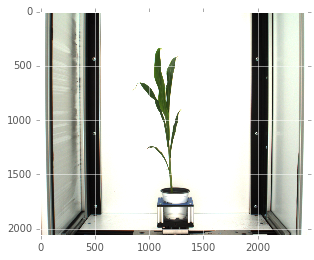

In [10]:
# Import the image from Clowder
img = io.imread(clowder + "/api/files/" + img_id)
plt.imshow(img)
plt.show()

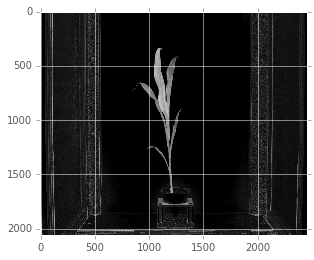

In [11]:
# Analyze the image with PlantCV
debug = "plot"
device = 0

# Convert RGB to HSV and extract the Saturation channel
device, s = pcv.rgb2gray_hsv(img, 's', device, debug)

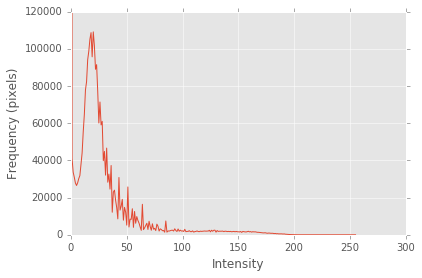

In [12]:
# Calculate an intensity histogram for the saturation channel image
hist_full = cv2.calcHist([s], [0], None, [256], [0,256])
plt.plot(hist_full)
plt.ylim([0,120000])
plt.xlabel("Intensity")
plt.ylabel("Frequency (pixels)")
plt.show()

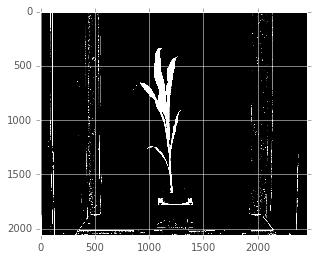

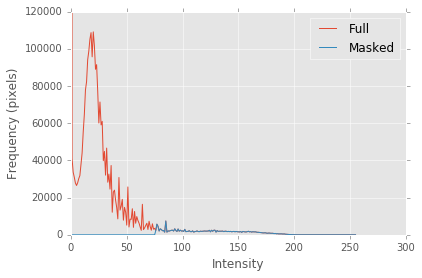

In [13]:
# Most of the lower intensities are background
# Select an x-axis threshold where everything below x will be set to 0 (black) and everything above to 256 (white)

# Apply a threshold
x_thresh = 75
device, s_thresh = pcv.binary_threshold(s, x_thresh, 255, 'light', device, debug)

# Compare the intensity histogram after thresholding
hist_masked = cv2.calcHist([s], [0], s_thresh, [256], [0,256])
plt.plot(hist_full, label="Full")
plt.plot(hist_masked, label="Masked")
plt.ylim([0,120000])
plt.legend(loc="best")
plt.xlabel("Intensity")
plt.ylabel("Frequency (pixels)")
plt.show()

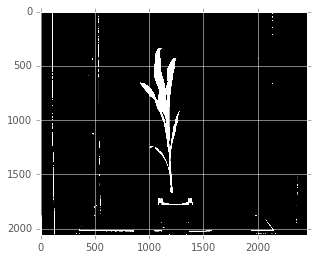

In [14]:
# Median Filter - breaks up straight-line background regions (e.g. sides of imaging cabinet)
device, s_mblur = pcv.median_blur(s_thresh, 11, device, debug)

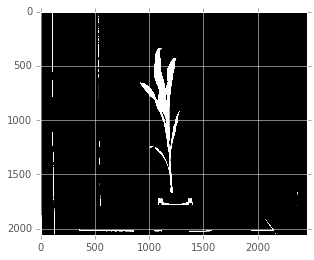

In [15]:
# Remove small white objects from the image
device, s_fill = pcv.fill(s_mblur, np.copy(s_mblur), 200, device, debug)

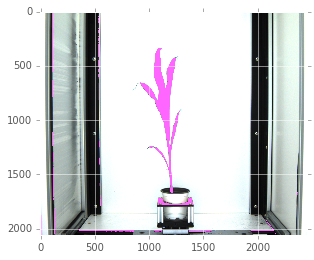

In [16]:
# Identify contours (object outlines)
device, id_objects, obj_hierarchy = pcv.find_objects(img, s_fill, device, debug)

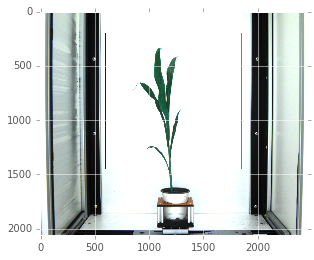

In [17]:
# Define a region of interest (ROI)
device, roi, roi_hierarchy = pcv.define_roi(img, 'rectangle', device, None, 'default',
                                            debug, True, 600, 200, -600, -600)

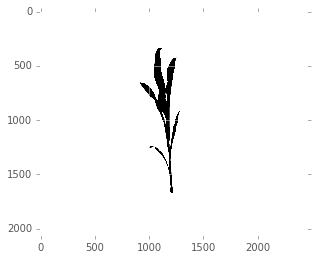

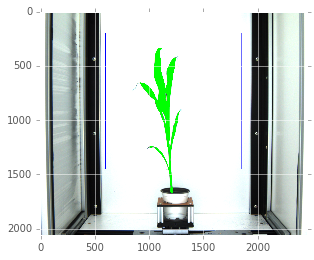

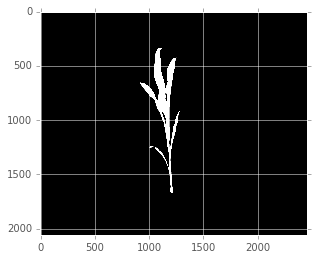

In [18]:
# Use the ROI to filter out non-plant contours
device, roi_objects, hierarchy, kept_mask, obj_area = pcv.roi_objects(img, 'partial', roi, roi_hierarchy, 
                                                                      id_objects, obj_hierarchy, device, debug)

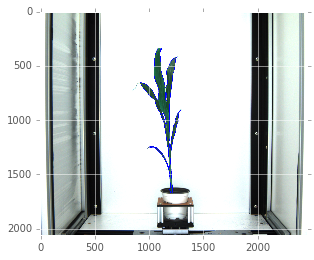

In [19]:
# Combine all of the remaining plant contours into a single object
device, obj, mask = pcv.object_composition(img, roi_objects, hierarchy, device, debug)

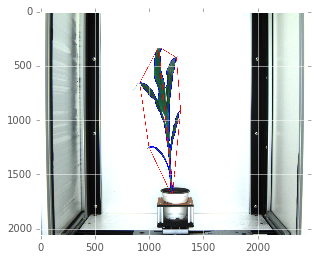

In [20]:
# Calculate the shape properties of the plant
device, shape_header, shape_data, shape_img = pcv.analyze_object(img, None, obj, mask, device, debug, None)

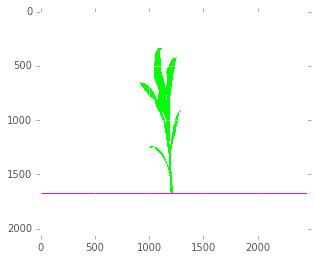

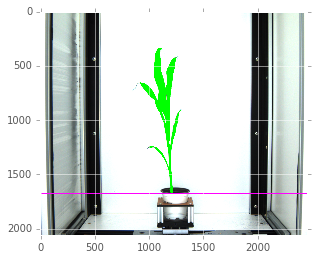

In [21]:
# Calculate additional shape properties relative to user boundary line
device, boundary_header, boundary_data, boundary_img = pcv.analyze_bound(img, None, obj, mask, 380, 
                                                                         device, debug, None)

In [22]:
# Print shape properties
headers = shape_header[1:] + boundary_header[1:]
data = shape_data[1:] + boundary_data[1:]
d = {"trait" : headers, "value" : data}
table = pandas.DataFrame(data=d)
display(table)

,trait,value
0,area,102654
1,hull-area,322788
2,solidity,0.318023
3,perimeter,7216.04
4,width,375
5,height,1332
6,longest_axis,1332
7,center-of-mass-x,1134.64
8,center-of-mass-y,834.423
9,hull_vertices,20


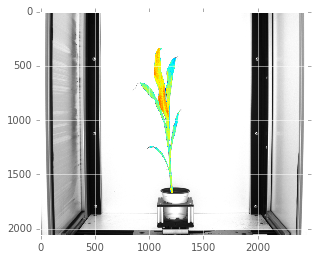

In [23]:
# Extract color information from the plant area
device, color_header, color_data, norm_slice = pcv.analyze_color(img, None, mask, 256, device, debug, None, 's',
                                                                 'img', 300, False)